### Week 1 - Baseline Modeling
- EDA
- Model (logsitic regression, positive / not positive)
- Vectorize the words, quick logisitic regression on positive comments

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in data
GoEmo_df = pd.read_csv('GoEmotions_cleaned_ekman.csv')

In [3]:
# get info
GoEmo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56873 entries, 0 to 56872
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              56873 non-null  object
 1   text            56873 non-null  object
 2   subreddit       56873 non-null  object
 3   admiration      56873 non-null  int64 
 4   amusement       56873 non-null  int64 
 5   anger           56873 non-null  int64 
 6   annoyance       56873 non-null  int64 
 7   approval        56873 non-null  int64 
 8   caring          56873 non-null  int64 
 9   confusion       56873 non-null  int64 
 10  curiosity       56873 non-null  int64 
 11  desire          56873 non-null  int64 
 12  disappointment  56873 non-null  int64 
 13  disapproval     56873 non-null  int64 
 14  disgust         56873 non-null  int64 
 15  embarrassment   56873 non-null  int64 
 16  excitement      56873 non-null  int64 
 17  fear            56873 non-null  int64 
 18  gratit

In [4]:
# change column width to fully read comments
pd.set_option('display.max_colwidth', None)
GoEmo_df['text'].head(20)

0                                                  Fast as [NAME] will carry me. Seriously uptown to downtown via Claiborne or broad isn’t that bad
1                                                                                                       You blew it. They played you like a fiddle.
2                                            TL;DR No more Superbowls for [NAME]. Get ready for another winning season that ends in disappointment.
3                                                                                                                          So much time saved. Not.
4                                   Emotes have a ridiculous amount of effort put into them, which only makes the fact that nobody uses them sadder
5                                                                               Just life.. I feel like i'm just a parasite that should be removed.
6                                                                                           Thanks for the advic

In [5]:
# separate sentiments and ekman emotions
sentiments = GoEmo_df.iloc[:, [30,31,32,33]]
ekman = GoEmo_df.iloc[:, [34,35,36,37,38,39]]

In [6]:
# class balance of sentiment
sentiments.sum()/sentiments.shape[0]*100

neutral      34.557699
positive     36.414467
negative     19.902238
ambiguous     9.125596
dtype: float64

In [7]:
# class balance of ekman emotions
ekman.sum()/39299*100

eck_anger       16.682358
eck_disgust      2.391918
eck_fear         2.162905
eck_joy         52.698542
eck_sadness      9.175806
eck_surprise    16.888470
dtype: float64

### Bag of words,
- just explore positive sentiment
- bag of words, remove stop words
- logistic regression model
- also look at frequency of words assicated with postiive sentiment

In [8]:
# new dataframe, just text and positive sentiment columns
simple_data = GoEmo_df.iloc[:, [1, 31]].copy()

In [9]:
# check
simple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56873 entries, 0 to 56872
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      56873 non-null  object
 1   positive  56873 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 888.8+ KB


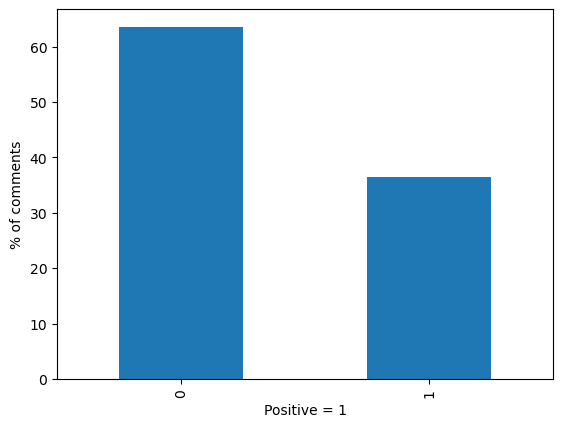

In [10]:
# get class balance
plt.figure()
simple_data['positive'].value_counts(normalize=True).mul(100).round(1).plot(kind ='bar')
plt.xlabel('Positive = 1')
plt.ylabel('% of comments')
plt.show()

36.4% positive <br>
63.6% not positive

In [11]:
# store simplified data in X and y
X = simple_data['text']
y = simple_data['positive']

In [12]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
# check size size of train
X_train.shape

(42654,)

In [14]:
# check size of test
X_test.shape

(14219,)

In [22]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate
bagofwords = CountVectorizer(stop_words="english")
# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test) 
X_train_transformed

<42654x26107 sparse matrix of type '<class 'numpy.int64'>'
	with 242340 stored elements in Compressed Sparse Row format>

c:\Users\trann\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


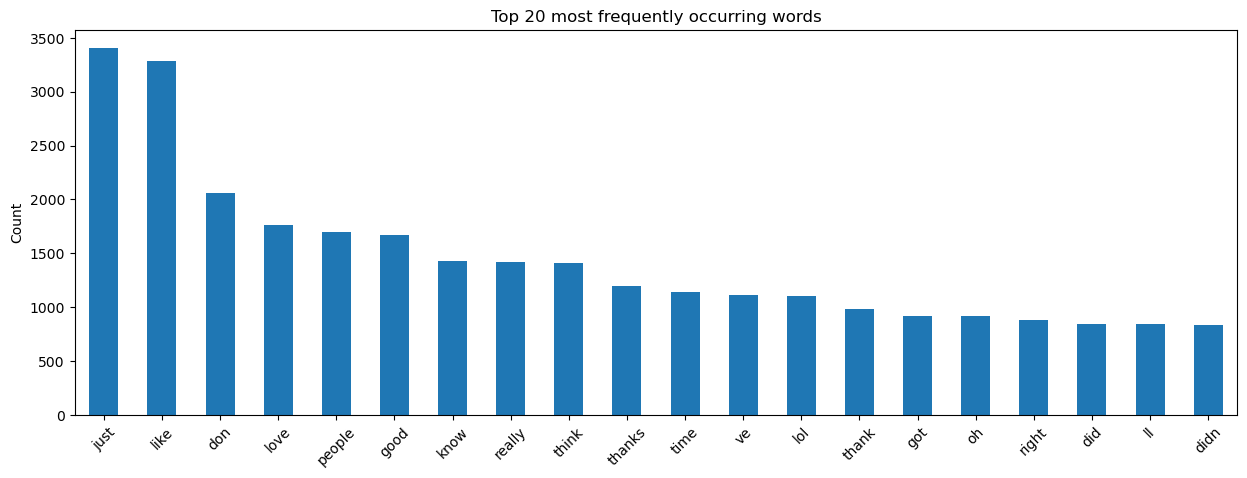

In [23]:
# get word count with bag of words
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [27]:
# fit logistic regression model

from sklearn.linear_model import LogisticRegression

# Fitting a model
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8849580344164674
Test score: 0.8273436950559111


c:\Users\trann\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\trann\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


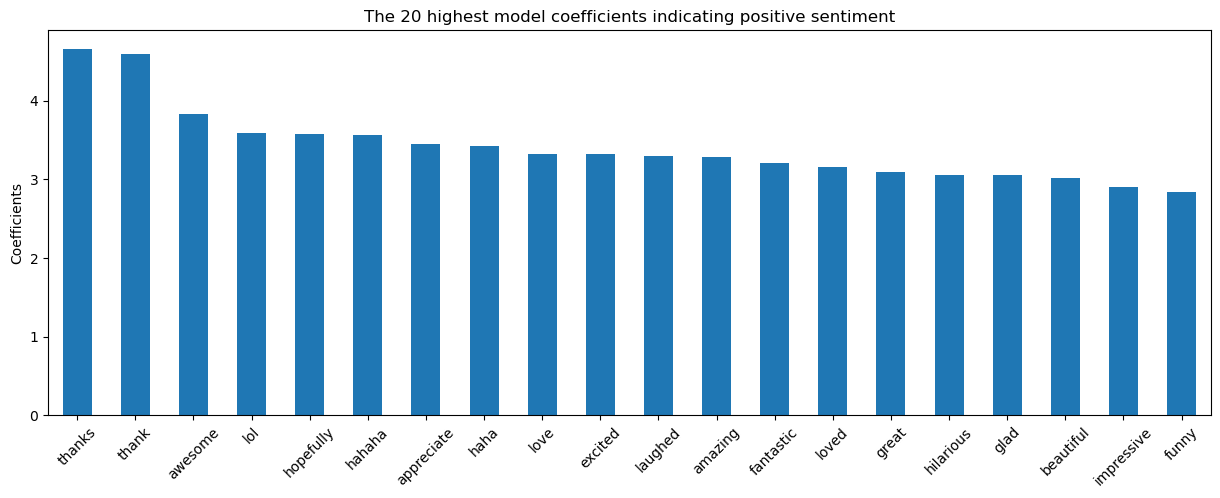

In [28]:
# get words with highest coefficients
word_counts = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=bagofwords.get_feature_names()
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

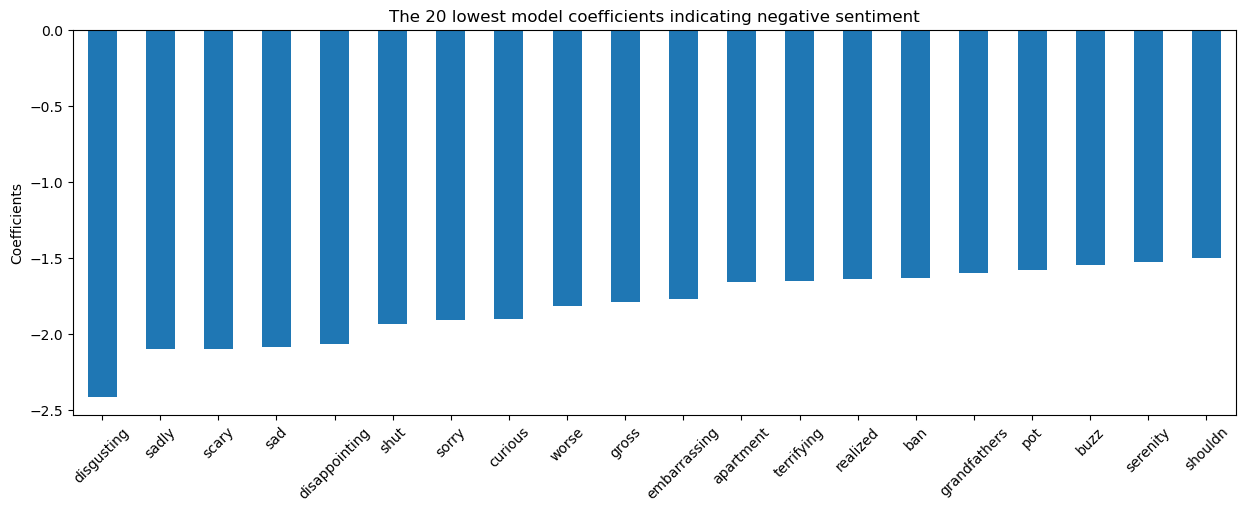

In [29]:
# get words with lowest coefficients
word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

highest postive sentiment words: thanks, thank, awesome, lol, hopefully <br>
lowest positive sentiment words: disgusting, sadly, scary, sad, disappointing

# Summary

- Base model for positive and non-positive comments is okay?
    - train 88.5%
    - test 82.7%
    - doesn't seem like it is overfit
- Balance of the data
    - 36.4% positive
    - 63.6% non-positive
- This gives me a model that is ~20% better than baseline


Next week try:
- more parameters, min_df?
- logistic parameters, C, penalties, solvers
- other tokenizers, TF-IDF
- try multiclass classification with positive/negative/neutral/ambiguous
